## Handling  Imbalanced Classification Using Neural Network

In [1]:
##Data ailabe on https://www.kaggle.com/mlg-ulb/creditcardfraud
import pandas as pd

In [2]:
df=pd.read_csv('/content/creditcard.csv')

In [4]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
41000,40495,-0.624852,1.012315,1.191056,-0.429560,1.190739,0.683069,0.785694,0.238579,-0.816029,-0.576027,0.120893,0.323846,0.231304,0.280666,-0.148773,0.621168,-1.216788,0.452088,-0.707298,-0.144796,0.140348,0.386729,-0.506975,-1.269542,0.473990,-0.347492,0.085019,0.069879,0.23,0.0
26586,34154,1.327091,-1.839419,1.426399,-0.872490,-2.474584,0.365044,-1.990997,0.293473,-0.109322,1.083580,-1.952854,-1.262061,-1.037109,-1.271925,-1.334747,-0.766134,1.100550,0.283515,0.353246,-0.329910,-0.225421,-0.024547,-0.090382,0.029028,0.347044,-0.023832,0.090790,0.036125,66.00,0.0
69198,53312,1.466448,-0.351247,0.261888,-0.870951,-0.589031,-0.529060,-0.471172,-0.222081,-0.924550,0.565059,-0.692452,-0.039305,1.774188,-0.502867,0.685256,1.399639,-0.158799,-1.491101,0.923564,0.186573,-0.135729,-0.431480,0.013347,-0.441487,0.392930,-0.432383,0.019148,0.017157,8.50,0.0
13185,23170,-3.743846,-3.265379,0.995384,3.041958,0.965919,-0.587442,1.862605,-0.117721,-0.399114,-0.722735,-0.145658,-3.240442,1.480600,2.002062,-0.222200,0.774424,0.046116,0.229815,-0.669974,2.299492,0.055303,-1.963346,2.270957,-0.387028,0.510184,-0.487578,-0.377596,0.173759,788.77,0.0
17466,28739,1.339415,-0.529655,0.216735,-0.745884,-0.904537,-0.850040,-0.441846,-0.145437,-1.149201,0.817498,1.433613,0.032837,0.015686,0.145318,-0.035784,1.192389,0.045160,-0.880958,0.802073,0.121078,0.276878,0.646162,-0.146038,0.363738,0.590683,-0.135874,-0.014406,0.004102,33.90,0.0
14532,25731,-1.079107,0.864305,0.940906,0.895823,0.108736,-0.270375,0.208897,0.506249,-0.971974,-0.188214,1.390120,0.714899,-0.325765,0.909457,0.574053,-0.337903,0.079594,0.169874,0.320127,-0.241761,0.275497,0.773991,0.277047,0.226301,-0.299521,-0.329788,-0.018221,0.043799,16.16,0.0
58874,48591,-1.112615,1.092782,1.028388,-0.058914,0.272149,-0.087061,0.536191,-0.034223,0.598923,0.280986,-1.561070,0.153720,0.534164,-0.701265,-0.591994,-0.368117,-0.302268,-0.221219,0.623193,0.251913,-0.130387,0.185870,-0.288144,-0.378633,-0.000942,0.336683,-0.275741,-0.214190,1.89,0.0
51073,44781,1.212052,-0.959967,-0.206043,-0.655178,0.862045,4.012905,-1.644911,1.057908,-0.495288,0.778167,-0.471831,-0.245579,0.556517,-0.176761,1.615716,-0.410868,-1.012699,2.393828,-1.198009,-0.259059,-0.124898,-0.110437,-0.078027,0.973434,0.398280,-0.244182,0.094124,0.052315,69.30,0.0
15102,26455,-2.126952,0.067513,1.382638,-1.134619,-0.019310,-0.911391,0.922957,-0.257019,0.691863,0.374862,0.321592,0.362988,0.473940,-0.557652,0.860064,0.141827,-0.477369,-1.046089,-1.212722,0.247552,-0.282331,-0.023101,0.132024,0.458041,-0.237156,0.724837,0.427331,0.479316,134.83,0.0
66139,51908,-0.274783,0.433790,1.725127,0.295856,-0.574206,-0.241198,0.268445,0.150842,0.141179,-0.470679,-0.447172,-0.542146,-1.675554,0.193417,0.602683,-0.946172,0.923623,-0.923852,1.060362,-0.007709,-0.156450,-0.349035,0.167466,0.414253,-0.880120,0.890068,0.095052,0.143239,28.41,0.0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
73372,55105,1.104021,-1.123835,1.008939,-0.460960,-1.502758,0.021138,-1.055043,0.095135,-0.175413,0.400911,-0.268529,-0.156764,0.650541,-0.743181,0.579152,0.886203,0.570025,-1.503342,0.063454,0.290500,0.405906,1.054006,-0.174455,0.155852,0.358077,-0.030114,0.048490,0.042121,119.00,0.0
73373,55105,1.182898,-0.283273,1.123494,0.066948,-1.283276,-0.900451,-0.441870,-0.150647,0.784691,-0.440016,0.048261,1.280371,1.267539,-0.612574,0.011451,-0.213949,0.139330,-0.728218,0.080394,0.040402,0.082278,0.491790,-0.025468,1.078368,0.258355,1.415871,-0.060454,0.014606,22.71,0.0
73374,55106,1.168124,-0.122507,1.251822,0.860341,-1.020137,-0.277310,-0.557856,0.023732,0.802378,-0.268421,-0.592991,0.888388,0.891074,-0.573731,0.108537,0.125763,-0.224311,-0.336169,-0.046550,-0.031082,-0.077921,-0.005984,0.014309,0.452036,0.281031,0.313100,0.020995,0.030389,16.35,0.0
73375,55106,-0.339385,-2.095670,0.271543,-3.066469,0.484794,3.870704,-2.069399,0.184347,-1.615958,0.846124,-0.459483,-1.048904,0.597583,-0.547536,0.852233,0.825829,-0.491551,1.123656,-1.193623,0.240066,0.964115,-0.266112,-0.993763,1.033766,0.748706,-0.116168,0.153607,0.268881,322.34,0.0
73376,55107,-1.020407,0.160171,0.152264,-0.093406,-0.978017,0.074549,1.610152,0.117407,-0.948643,-0.946644,-1.042157,0.285608,1.505022,0.316336,1.070617,0.293405,-0.294508,-0.074202,1.100115,0.844151,0.109380,-0.400171,0.835422,-0.428141,-0.464220,NaN,NaN,NaN,NaN,NaN


In [6]:
df['Class'].value_counts()

0.0    73198
1.0      178
Name: Class, dtype: int64

From the class level output, we can see it is imbalanced problem

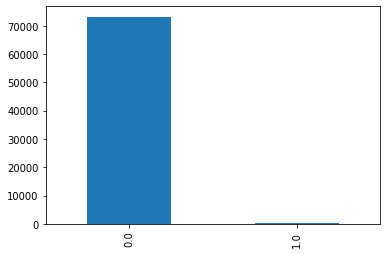

In [7]:
pd.value_counts(df['Class']).plot.bar()

In [8]:
### We will do the following
#Step1 -We Will Create an ANN and solve this problem(ROC AUC) 
#Step2- We will use some Weights handling techniques to solve this imbalanced then we create
#The ANN

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73377 entries, 0 to 73376
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    73377 non-null  int64  
 1   V1      73377 non-null  float64
 2   V2      73377 non-null  float64
 3   V3      73377 non-null  float64
 4   V4      73377 non-null  float64
 5   V5      73377 non-null  float64
 6   V6      73377 non-null  float64
 7   V7      73377 non-null  float64
 8   V8      73377 non-null  float64
 9   V9      73377 non-null  float64
 10  V10     73377 non-null  float64
 11  V11     73377 non-null  float64
 12  V12     73377 non-null  float64
 13  V13     73377 non-null  float64
 14  V14     73377 non-null  float64
 15  V15     73377 non-null  float64
 16  V16     73377 non-null  float64
 17  V17     73377 non-null  float64
 18  V18     73377 non-null  float64
 19  V19     73377 non-null  float64
 20  V20     73377 non-null  float64
 21  V21     73377 non-null  float64
 22

Ignore the Time column as it has very less variance values 

In [20]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [21]:
df = df.dropna()

In [22]:
X=df.iloc[:,1:30]
y=df.iloc[:,-1]

In [23]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [24]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [27]:
y_train.value_counts()

0.0    51240
1.0      123
Name: Class, dtype: int64

In [28]:
##Step1
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [29]:
print(len(X.columns))
n_inputs=29

29


In [30]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1606/1606 [==============================] - 2s 1ms/step - loss: 0.0946
Epoch 2/10
1606/1606 [==============================] - 2s 1ms/step - loss: 0.0092
Epoch 3/10
1606/1606 [==============================] - 2s 1ms/step - loss: 0.0122
Epoch 4/10
1606/1606 [==============================] - 2s 1ms/step - loss: 0.0087
Epoch 5/10
1606/1606 [==============================] - 2s 1ms/step - loss: 0.0102
Epoch 6/10
1606/1606 [==============================] - 2s 1ms/step - loss: 0.0132
Epoch 7/10
1606/1606 [==============================] - 2s 1ms/step - loss: 0.0226
Epoch 8/10
1606/1606 [==============================] - 2s 1ms/step - loss: 0.0048
Epoch 9/10
1606/1606 [==============================] - 2s 1ms/step - loss: 0.0101
Epoch 10/10
1606/1606 [==============================] - 2s 1ms/step - loss: 0.0152


In [34]:
from sklearn.metrics import roc_auc_score
y_pred1=model.predict(X_test)
y_pred1

array([[0.0000000e+00],
       [1.1476488e-36],
       [2.2729296e-06],
       ...,
       [2.2404335e-11],
       [6.4103006e-08],
       [8.3365876e-06]], dtype=float32)

In [ ]:
print(roc_auc_score(y_test,y_pred1))

### Weighted Neural Network With Keras
* Define Weights
* Fit the model with thos specific weights


In [35]:
weights_assigned={0:1,1:550}

In [36]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,class_weight=weights_assigned,epochs=10)

Epoch 1/10
1606/1606 [==============================] - 2s 1ms/step - loss: 3.6530
Epoch 2/10
1606/1606 [==============================] - 2s 1ms/step - loss: 5.2639
Epoch 3/10
1606/1606 [==============================] - 2s 1ms/step - loss: 3.4559
Epoch 4/10
1606/1606 [==============================] - 2s 1ms/step - loss: 3.3018
Epoch 5/10
1606/1606 [==============================] - 2s 1ms/step - loss: 1.1469
Epoch 6/10
1606/1606 [==============================] - 2s 1ms/step - loss: 3.6103
Epoch 7/10
1606/1606 [==============================] - 2s 1ms/step - loss: 3.4353
Epoch 8/10
1606/1606 [==============================] - 2s 1ms/step - loss: 1.0164
Epoch 9/10
1606/1606 [==============================] - 2s 1ms/step - loss: 0.6925
Epoch 10/10
1606/1606 [==============================] - 2s 1ms/step - loss: 4.2996


In [37]:
y_pred=model.predict(X_test)

In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
roc_auc_score(y_test,y_pred)

0.9895817635320322